## Loading the dataframe and merging on registration  number

In [17]:
import pandas as pd

df_tt1 = pd.read_csv("term-test-1-result.csv")
df_tt2 = pd.read_csv("term-test-2-result.csv")

In [18]:
df_merged = pd.merge(df_tt1, df_tt2, on=['Registration Number', 'Name'])

print(df_merged.head())

   Registration Number                    Name  TT-1 Marks  TT-2 Marks
0             20165001             Ummey Honey          15           5
1             20165002  Tangimul Hoque Bhuiyan          17          15
2             20165003      Syed Kinkel Uddin            8           6
3             20165004              Radia Khan          18           8
4             20165005           Abida sultana           6           8


## Best Marks & Average Marks column

In [19]:

df_merged['Best Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

df_merged['Average Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)
print(df_merged.head())

   Registration Number                    Name  TT-1 Marks  TT-2 Marks  \
0             20165001             Ummey Honey          15           5   
1             20165002  Tangimul Hoque Bhuiyan          17          15   
2             20165003      Syed Kinkel Uddin            8           6   
3             20165004              Radia Khan          18           8   
4             20165005           Abida sultana           6           8   

   Best Marks  Average Marks  
0          15           10.0  
1          17           16.0  
2           8            7.0  
3          18           13.0  
4           8            7.0  


## Dropping TT1 &TT2

In [20]:
df_merged.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)
print(df_merged.head())

   Registration Number                    Name  Best Marks  Average Marks
0             20165001             Ummey Honey          15           10.0
1             20165002  Tangimul Hoque Bhuiyan          17           16.0
2             20165003      Syed Kinkel Uddin            8            7.0
3             20165004              Radia Khan          18           13.0
4             20165005           Abida sultana           8            7.0


## Loading the attendance, term final sheet & getting final marks with the given equation

In [21]:
df_attendance = pd.read_csv("attendance-term-final.csv")

df_final = pd.merge(df_merged, df_attendance, on=['Registration Number', 'Name'])

df_final['Final Marks'] = df_final['Term Final Marks'] * 0.7 + df_final['Average Marks'] + df_final['Attendance Marks']

print(df_final.head())

   Registration Number                    Name  Best Marks  Average Marks  \
0             20165001             Ummey Honey          15           10.0   
1             20165002  Tangimul Hoque Bhuiyan          17           16.0   
2             20165003      Syed Kinkel Uddin            8            7.0   
3             20165004              Radia Khan          18           13.0   
4             20165005           Abida sultana           8            7.0   

   Attendance Marks  Term Final Marks  Final Marks  
0                 9                76         72.2  
1                 8                43         54.1  
2                 5                71         61.7  
3                10                43         53.1  
4                 9                77         69.9  


## dataframe to csv

In [22]:
df_final.to_csv("final result.csv", index=False)

# K-Means Clustering

In [23]:
import pandas as pd
f=pd.read_csv("final result.csv")
f.head()

,Registration Number,Name,Best Marks,Average Marks,Attendance Marks,Term Final Marks,Final Marks
0,20165001,Ummey Honey,15,10.0,9,76,72.2
1,20165002,Tangimul Hoque Bhuiyan,17,16.0,8,43,54.1
2,20165003,Syed Kinkel Uddin,8,7.0,5,71,61.7
3,20165004,Radia Khan,18,13.0,10,43,53.1
4,20165005,Abida sultana,8,7.0,9,77,69.9


In [24]:
x=f.index.tolist()

y=f["Final Marks"].tolist()
x,y
data = list(zip(x, y))
data

[(0, 72.19999999999999),
 (1, 54.1),
 (2, 61.7),
 (3, 53.1),
 (4, 69.9),
 (5, 75.9),
 (6, 78.9),
 (7, 50.3),
 (8, 64.3),
 (9, 80.0),
 (10, 57.3),
 (11, 87.1),
 (12, 76.9),
 (13, 67.5),
 (14, 86.6),
 (15, 70.9),
 (16, 47.7),
 (17, 81.4),
 (18, 63.1),
 (19, 53.2),
 (20, 75.4),
 (21, 94.8),
 (22, 87.19999999999999),
 (23, 62.2),
 (24, 80.0),
 (25, 77.9),
 (26, 81.8),
 (27, 70.9),
 (28, 76.3),
 (29, 89.5),
 (30, 61.7),
 (31, 78.6),
 (32, 63.6),
 (33, 62.3),
 (34, 82.1),
 (35, 89.0),
 (36, 85.8),
 (37, 83.1),
 (38, 63.2),
 (39, 86.3),
 (40, 60.2),
 (41, 61.1),
 (42, 67.5),
 (43, 69.69999999999999),
 (44, 64.1),
 (45, 59.2),
 (46, 55.9),
 (47, 50.7),
 (48, 47.2),
 (49, 52.7)]

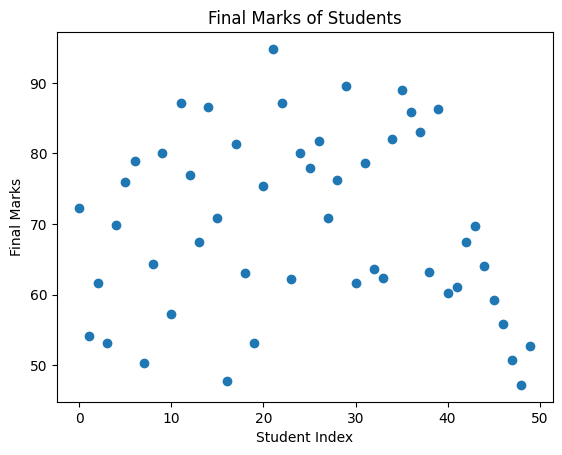

In [25]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.title('Final Marks of Students')
plt.xlabel('Student Index')
plt.ylabel('Final Marks')
plt.show()

### Using Elbow method to determine the suitable number of clusters

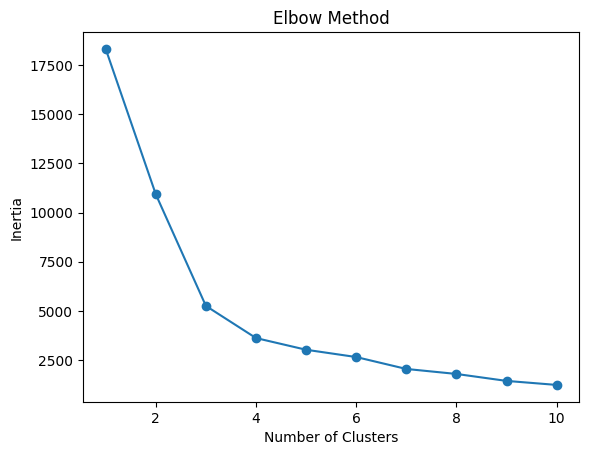

In [26]:
from sklearn.cluster import KMeans
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show() 

### Cluster of the final marks of each student

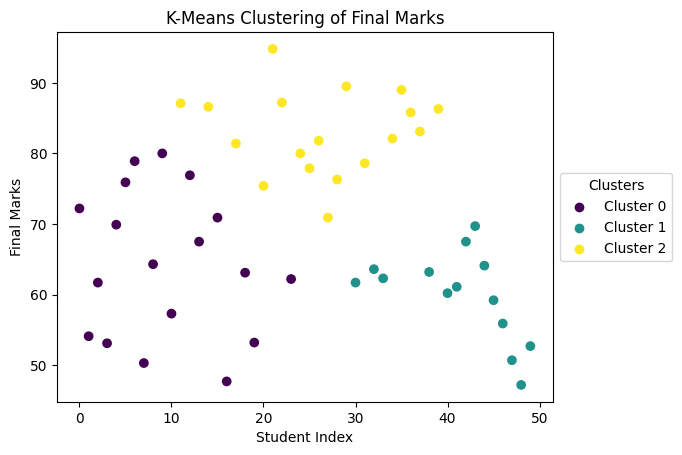

In [27]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_

plt.scatter(x, y, c=labels, cmap='viridis')

for cluster in range(3):
    plt.scatter([], [], color=plt.cm.viridis(cluster / 2), label=f'Cluster {cluster}')
plt.title('K-Means Clustering of Final Marks')
plt.xlabel('Student Index')
plt.ylabel('Final Marks')
plt.legend(title='Clusters', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()